<a href="https://colab.research.google.com/github/Ut-kaikai/monodukurikensyu/blob/main/ex04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 航空宇宙情報システム学第一 小課題4

## 出題: 12月8日 , 期限: 1月5日

## 課題内容


### **(1)** 10桁2進数の（文字列の）リスト
10桁の2進数は、0000000000から1111111111まで計$2^{10}=1024$個あります。この1024個の2進数の**文字列**のリストを作ってください。つまり、リストの名前を`binlist`とした場合、
```
binlist = ['0000000000','0000000001', ..(途中略).. , '1111111111']
```
のようになります。リスト内の順番は自由で構いません。

* **(ヒント)**
この問題は色々なやり方があるので、まず自分で方法を考えてもらいたいのですが、もし、やり方が思いつかない場合は、0から1023までの10進数を2進数の文字列に変換する方法を試してみてください。
10進数の数`i` を **n桁の2進数の文字列** に変換するには、`format()`関数を使って、
`format(i,'010b')` とするのが楽です。例えば、10進数の999は、
```
>>> format(999,'10b')
'1111100111'
```
のように求まります。

### **(2)** '0'と'1'を5個ずつ含む10桁2進数文字列のリスト
**0と1を5個ずつ含む2進数の文字列のリスト**を作ってください。そのような2進数の個数は、${}_{10}C_5 = 252$ (個)となるはずです。

* **(ヒント)** 前問で求めた1024個の10桁2進数文字列のリストに対するfilter処理と考えることができます。それ以外にも再帰呼び出しを使う方法、探索木(ちょっと高度)を使う方法などもあります。

### **(3)** 前問題の答えを10進数に直したリスト
**0と1を5個ずつ含む2進数**を**10進数**に直した整数のリストを作ってください。

* **(ヒント)** 前問で求めたリストに対するmap処理と考えることができます。また、2進数文字列`bstr`から10進数への変換は、`int(bstr,2)`を使うのが楽ですが、`divmod()`などを使って実装するのも面白いと思います。


In [4]:
binlist=[]

def binary(current_str_prefix):
  if len(current_str_prefix) == 10:
    binlist.append(current_str_prefix)
    return
  else:
    for i in range(2):
      binary(current_str_prefix + str(i))

binary("")
print(binlist)

['0000000000', '0000000001', '0000000010', '0000000011', '0000000100', '0000000101', '0000000110', '0000000111', '0000001000', '0000001001', '0000001010', '0000001011', '0000001100', '0000001101', '0000001110', '0000001111', '0000010000', '0000010001', '0000010010', '0000010011', '0000010100', '0000010101', '0000010110', '0000010111', '0000011000', '0000011001', '0000011010', '0000011011', '0000011100', '0000011101', '0000011110', '0000011111', '0000100000', '0000100001', '0000100010', '0000100011', '0000100100', '0000100101', '0000100110', '0000100111', '0000101000', '0000101001', '0000101010', '0000101011', '0000101100', '0000101101', '0000101110', '0000101111', '0000110000', '0000110001', '0000110010', '0000110011', '0000110100', '0000110101', '0000110110', '0000110111', '0000111000', '0000111001', '0000111010', '0000111011', '0000111100', '0000111101', '0000111110', '0000111111', '0001000000', '0001000001', '0001000010', '0001000011', '0001000100', '0001000101', '0001000110', '0001

In [7]:
anslist=[]
for i in range(len(binlist)):
  cnt=0
  for j in range(10):
    if(binlist[i][j]=='0'):
      cnt+=1
  if(cnt==5):
    anslist.append(binlist[i])
print(anslist)

['0000011111', '0000101111', '0000110111', '0000111011', '0000111101', '0000111110', '0001001111', '0001010111', '0001011011', '0001011101', '0001011110', '0001100111', '0001101011', '0001101101', '0001101110', '0001110011', '0001110101', '0001110110', '0001111001', '0001111010', '0001111100', '0010001111', '0010010111', '0010011011', '0010011101', '0010011110', '0010100111', '0010101011', '0010101101', '0010101110', '0010110011', '0010110101', '0010110110', '0010111001', '0010111010', '0010111100', '0011000111', '0011001011', '0011001101', '0011001110', '0011010011', '0011010101', '0011010110', '0011011001', '0011011010', '0011011100', '0011100011', '0011100101', '0011100110', '0011101001', '0011101010', '0011101100', '0011110001', '0011110010', '0011110100', '0011111000', '0100001111', '0100010111', '0100011011', '0100011101', '0100011110', '0100100111', '0100101011', '0100101101', '0100101110', '0100110011', '0100110101', '0100110110', '0100111001', '0100111010', '0100111100', '0101

In [8]:
dixlist=[]
for i in range(len(anslist)):
  dixlist.append(int(anslist[i],2))
print(dixlist)

[31, 47, 55, 59, 61, 62, 79, 87, 91, 93, 94, 103, 107, 109, 110, 115, 117, 118, 121, 122, 124, 143, 151, 155, 157, 158, 167, 171, 173, 174, 179, 181, 182, 185, 186, 188, 199, 203, 205, 206, 211, 213, 214, 217, 218, 220, 227, 229, 230, 233, 234, 236, 241, 242, 244, 248, 271, 279, 283, 285, 286, 295, 299, 301, 302, 307, 309, 310, 313, 314, 316, 327, 331, 333, 334, 339, 341, 342, 345, 346, 348, 355, 357, 358, 361, 362, 364, 369, 370, 372, 376, 391, 395, 397, 398, 403, 405, 406, 409, 410, 412, 419, 421, 422, 425, 426, 428, 433, 434, 436, 440, 451, 453, 454, 457, 458, 460, 465, 466, 468, 472, 481, 482, 484, 488, 496, 527, 535, 539, 541, 542, 551, 555, 557, 558, 563, 565, 566, 569, 570, 572, 583, 587, 589, 590, 595, 597, 598, 601, 602, 604, 611, 613, 614, 617, 618, 620, 625, 626, 628, 632, 647, 651, 653, 654, 659, 661, 662, 665, 666, 668, 675, 677, 678, 681, 682, 684, 689, 690, 692, 696, 707, 709, 710, 713, 714, 716, 721, 722, 724, 728, 737, 738, 740, 744, 752, 775, 779, 781, 782, 787, 789, 

## ボーナス課題(任意提出): 余裕のある人はやってみてください。

### **(4)** 出発地点からゴールまでの経路コストのリスト

下の図のような格子状の街路ネットワークで、原点(0,0)から、<font color="red">右に計5回、上に計5回進むことで</font>、ゴール(5,5)に到達する経路（道順）を考えるとします。
そのような経路のパターンの数は、「10回のうち5回右に進み5回上に進む」組み合わせの数ですから、**(2)** と同じく、${}_{10}C_5 = 252$通りになります。特に、<font color="blue">右に進むのを'0'</font>、<font color="red">上に進むのを'1'</font>で表せば、**(2)**で求めた252個の10桁2進数の文字列がその252通りの経路を表現することになります。

また、図の中に記されている<font color="blue">青数字は**右へ**の移動コスト</font>、<font color="red">赤数字は**上へ**の移動コスト</font>を表しています。
ここで、<font color="blue">点$(i,j)$から点$(i+1,j)$への右移動コストは、`h[i][j]` で参照でき</font>、<font color="red">点$(i,j)$から点$(i,j+1)$への上移動コストは、`v[i][j]`</font> で参照できます。

例えば、
$$
(0,0)\xrightarrow{右}(1,0)\xrightarrow{右}(2,0)\xrightarrow{右}(3,0)\xrightarrow{右}(4,0)\xrightarrow{右}(5,0) \\
\xrightarrow{上}(5,1)\xrightarrow{上}(5,2)\xrightarrow{上}(5,3)\xrightarrow{上}(5,4)\xrightarrow{上}(5,5)
$$
という経路(2進数文字列で表せば、'0000011111')の移動コストは、
```
>>> h[0][0]+h[1][0]+h[2][0]+h[3][0]+h[4][0]+v[5][0]+v[5][1]+v[5][2]+v[5][3]+v[5][4]
184
```
のように求めることができます。

このとき、252経路の移動コストのリストを求めてください。また、移動コストが最小の経路、最大の経路を、2進数文字列で表現したものを求めてください。


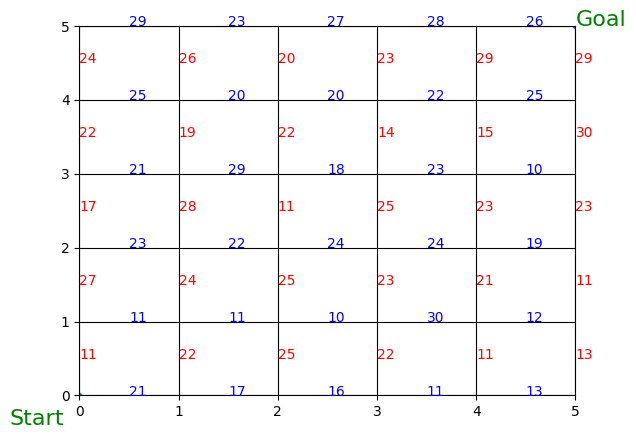

In [9]:
#@title
# 横方向の各辺のコスト
# 横方向の各辺のコスト
h = [[21, 11, 23, 21, 25, 29],
     [17, 11, 22, 29, 20, 23],
     [16, 10, 24, 18, 20, 27],
     [11, 30, 24, 23, 22, 28],
     [13, 12, 19, 10, 25, 26]]
# 縦方向の各辺のコスト
v = [[11, 27, 17, 22, 24],
     [22, 24, 28, 19, 26],
     [25, 25, 11, 22, 20],
     [22, 23, 25, 14, 23],
     [11, 21, 23, 15, 29],
     [13, 11, 23, 30, 29]]
import matplotlib.pyplot as plt
plt.plot([0.0,5.0],[0.0,5.0],'.')
[[plt.text(i+0.5,j,str(h[i][j]),color='blue') for i in range(5)] for j in range(6)]
[[plt.text(i,j+0.5,str(v[i][j]),color='red') for i in range(6)] for j in range(5)]
plt.text(-0.7,-0.4,'Start',color='g',fontsize=16)
plt.text(5,5,'Goal',color='g',fontsize=16)
plt.xlim((0,5))
plt.ylim((0,5))
plt.grid(True,color='black')